# Car Price Prediction

Covid-19 has impacted the market in several ways, the car market is also one hit by this. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

1) Data Collection Phase

2) Model Building Phase

Data has been collected from websites like olx.in and cars24.com using Selenium technique of web scraping.

The Data Collected is in raw form here we will be cleaning data first. It also consists of null values which we have dealt with. This project further consists of regression model building and finding the best model. We have further gained conclusions from various EDAs done. 

## Data Description

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"data.csv")
df.head()

,Unnamed: 0,CarName,Owner,YearofPurchase,Transmission,Model,Distance,Fuel,Price,website,Product_url
0,0,Hyundai Elantra (2013),1st,2013.0,MANUAL,1.6 SX Option,88147.0 KM,DIESEL,"₹ 5,90,000",olx.in,https://www.olx.in/item/hyundai-elantra-16-sx-...
1,1,Hyundai Xcent (2016),1st,2016.0,MANUAL,1.2 CRDi SX,59000.0 KM,DIESEL,"₹ 5,25,000",olx.in,https://www.olx.in/item/hyundai-xcent-12-crdi-...
2,2,Maruti Suzuki Alto K10 (2011),1st,2011.0,MANUAL,VXI,68000.0 KM,PETROL,"₹ 2,15,000",olx.in,https://www.olx.in/item/maruti-suzuki-alto-k10...
3,3,Honda City (2014),Second,2014.0,MANUAL,2014-2015 i VTEC V,56553 KM,PETROL,"₹ 5,75,000",olx.in,https://www.olx.in/item/honda-city-with-excell...
4,4,Renault Duster (2016),First,2016.0,MANUAL,85PS Diesel RxS,50509 KM,DIESEL,"₹ 6,00,000",olx.in,https://www.olx.in/item/renault-duster-2016-di...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
Unnamed: 0        1800 non-null int64
CarName           1779 non-null object
Owner             1779 non-null object
YearofPurchase    1799 non-null float64
Transmission      1757 non-null object
Model             1741 non-null object
Distance          1779 non-null object
Fuel              1779 non-null object
Price             1779 non-null object
website           1800 non-null object
Product_url       1800 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 154.8+ KB


All The data present is in object data type except Unnamed: 0 column.

In [4]:
df.shape

(1800, 11)

No. of rows= 1800

No. of columns= 11

In [5]:
df.isnull().sum()

Unnamed: 0         0
CarName           21
Owner             21
YearofPurchase     1
Transmission      43
Model             59
Distance          21
Fuel              21
Price             21
website            0
Product_url        0
dtype: int64

We observe null values in our data and so we will delete rows having null data with a threshold of 8 columns.

In [6]:
df.dropna(thresh=8,axis=0,inplace=True)

In [7]:
df.reset_index(inplace=True)

In [8]:
df.isnull().sum()

index              0
Unnamed: 0         0
CarName            0
Owner              0
YearofPurchase     0
Transmission      35
Model             38
Distance           0
Fuel               0
Price              0
website            0
Product_url        0
dtype: int64

We still observe null values and now we will use imputation technique to deal with it.

## Data Cleaning

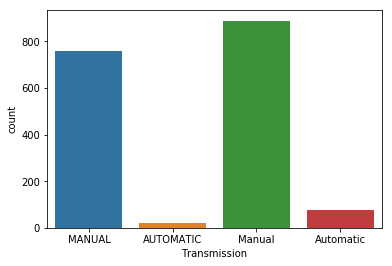

In [9]:
sns.countplot(df["Transmission"])

In [10]:
df["Transmission"].replace("MANUAL","Manual",True)
df["Transmission"].replace("AUTOMATIC","Automatic",True)
df["Transmission"].value_counts()

Manual       1647
Automatic      97
Name: Transmission, dtype: int64

In [11]:
df["Transmission"].fillna("Manual",inplace=True)

In [12]:
df["Model"].value_counts()

LXI Manual                          108
VXI Manual                           95
VDI Manual                           77
VDI BS IV Manual                     32
DELTA 1.2 K12 Manual                 29
Others                               26
VDI ABS Manual                       23
VXI                                  23
LXI                                  20
VDI                                  20
ZDI Manual                           20
D Lite Plus                          16
VDi                                  15
LDI                                  15
LS                                   13
RXL Manual                           13
ZDi                                  13
1.2 CRDi SX                          13
MAGNA 1.2 KAPPA VTVT Manual          12
MAGNA 1.2 KAPPA2 Manual              12
2.5 V 7 STR                          11
K10 VXi (O)                          11
XZ                                   11
320d GT Luxury Line                  11
2010-2015 4X4                        11


In [13]:
df["Model"].fillna(value="Others",inplace=True)

In [14]:
p=[]
price=df["Price"]
for i in range(len(price)):
    st=price[i]
    st=st.replace(",","")
    p.append(st[2:])
df["Price"]=p

In [15]:
d=[]
dist=df["Distance"]
for i in range(len(dist)):
    st=dist[i]
    st=st.replace(",","")
    d.append(st[:-3])
df["Distance"]=d

In [16]:
df_type_dict={'Price':int}
df=df.astype(df_type_dict)
df.dtypes

index               int64
Unnamed: 0          int64
CarName            object
Owner              object
YearofPurchase    float64
Transmission       object
Model              object
Distance           object
Fuel               object
Price               int32
website            object
Product_url        object
dtype: object

In [17]:
df_type_dict={'Distance':float}
df=df.astype(df_type_dict)
df.dtypes

index               int64
Unnamed: 0          int64
CarName            object
Owner              object
YearofPurchase    float64
Transmission       object
Model              object
Distance          float64
Fuel               object
Price               int32
website            object
Product_url        object
dtype: object

In [18]:
df["Owner"].value_counts()

1st Owner    807
1st          427
2nd          182
2nd Owner    166
First         62
3rd           45
--            34
3rd Owner     25
Second        16
4th           11
Third          2
4th Owner      2
Name: Owner, dtype: int64

In [19]:
owner=[]
for i in df["Owner"]:
    if i=="1st Owner" or i=="1st" or i=="First":
        owner.append(1)
    elif i=="2nd" or i=="2nd Owner" or i=="Second":
        owner.append(2)
    elif i=="3rd" or i=="3rd Owner" or i=="Third":
        owner.append(3)
    elif i=="4th" or i=="4th Owner" or i=="Fourth":
        owner.append(4)
    else:
        owner.append(np.nan)
df["Owner"]=owner

In [20]:
df["Owner"].isnull().sum()

34

In [21]:
df["Owner"].fillna(value=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 12 columns):
index             1779 non-null int64
Unnamed: 0        1779 non-null int64
CarName           1779 non-null object
Owner             1779 non-null float64
YearofPurchase    1779 non-null float64
Transmission      1779 non-null object
Model             1779 non-null object
Distance          1779 non-null float64
Fuel              1779 non-null object
Price             1779 non-null int32
website           1779 non-null object
Product_url       1779 non-null object
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 159.9+ KB


In [23]:
df.describe()

,index,Unnamed: 0,Owner,YearofPurchase,Distance,Price
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1.779000e+03
mean,905.418212,905.418212,1.307476,2014.310287,59428.679595,2.776836e+05
std,519.330474,519.330474,0.581303,3.551701,65715.863432,4.480986e+05
min,0.000000,0.000000,1.000000,2003.000000,0.000000,0.000000e+00
25%,456.500000,456.500000,1.000000,2012.000000,33598.500000,4.189950e+04
50%,910.000000,910.000000,1.000000,2015.000000,54000.000000,8.839900e+04
75%,1354.500000,1354.500000,2.000000,2017.000000,74844.500000,3.750000e+05
max,1799.000000,1799.000000,4.000000,2021.000000,999999.000000,4.400000e+06


We observe too high difference between 75th percentile and maximum vaue in distance thus concluding presence of otliers in this column.

Since index, unnamed: 0 and Product_url are not going to contribute in our model we will delete these columns.

In [24]:
df.drop(columns=["index","Unnamed: 0","Product_url"],inplace=True)

## EDA (Univariate and Bivariate Analysis)

In [25]:
df["Fuel"].value_counts()

Petrol           648
DIESEL           395
Diesel           347
PETROL           285
CNG & HYBRIDS     46
LPG               24
--                23
CNG                6
Petrol + CNG       5
Name: Fuel, dtype: int64

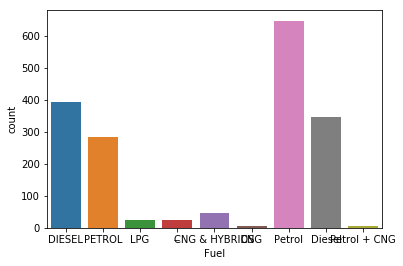

In [26]:
sns.countplot(df["Fuel"])

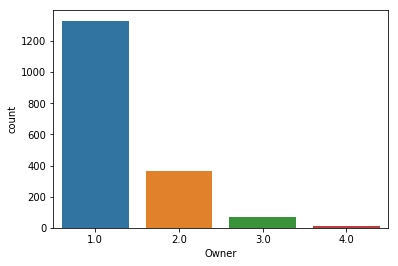

In [27]:
sns.countplot(df["Owner"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

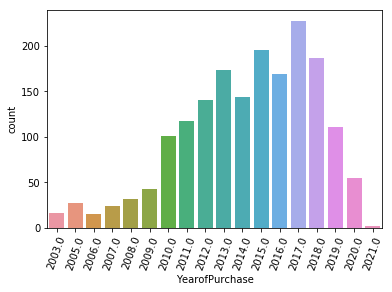

In [28]:
sns.countplot(df["YearofPurchase"])
plt.xticks(rotation=70)

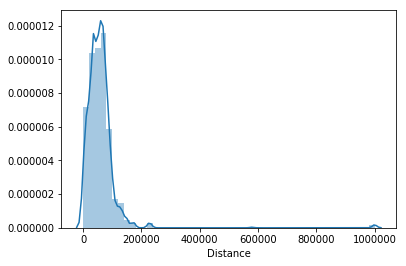

In [29]:
sns.distplot(df["Distance"])

Distanceis not normally distributed thus we observe skewness here.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

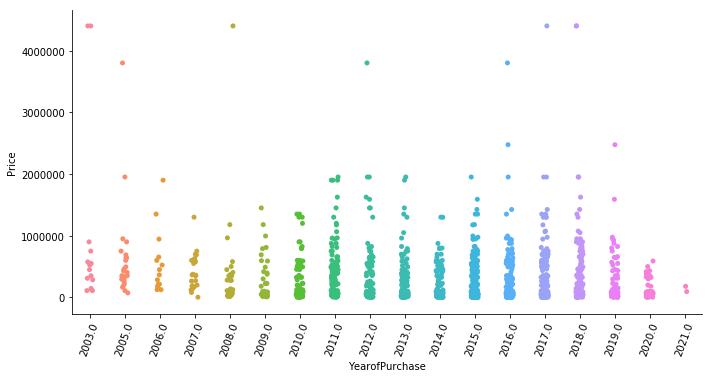

In [30]:
sns.catplot(x="YearofPurchase",y="Price", data=df, aspect=2)
plt.xticks(rotation=70)

Recent purchased car has more price as compared to previously purchased cars.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

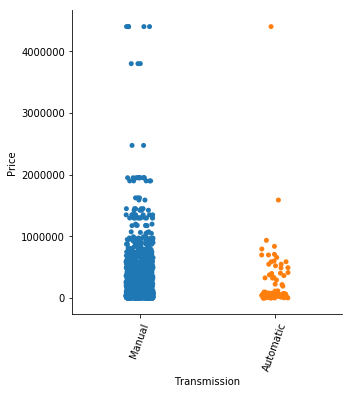

In [31]:
sns.catplot(x="Transmission",y="Price", data=df)
plt.xticks(rotation=70)

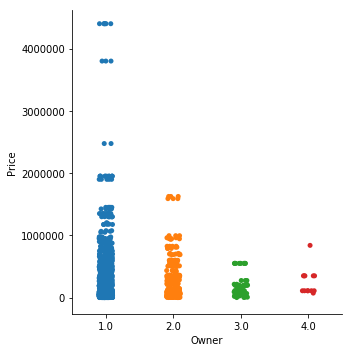

In [32]:
sns.catplot(x="Owner",y="Price", data=df)

Less the number of owners greater the price of car

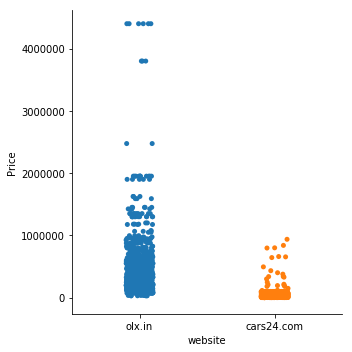

In [33]:
sns.catplot(x="website",y="Price", data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

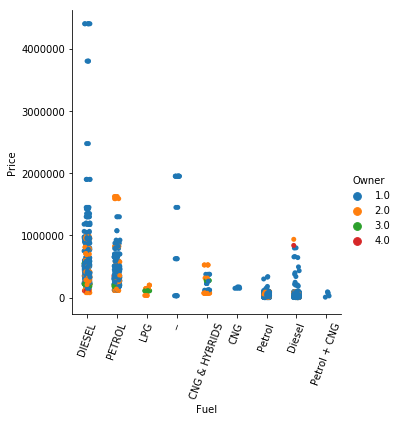

In [34]:
sns.catplot(x="Fuel",y="Price",hue="Owner", data=df)
plt.xticks(rotation=70)

Diesel car have higher price as compared to those with other fuels.

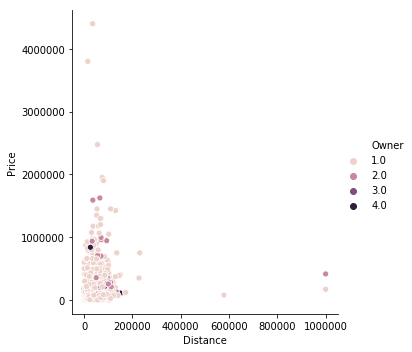

In [35]:
sns.relplot(x="Distance",y="Price",data=df, hue="Owner")

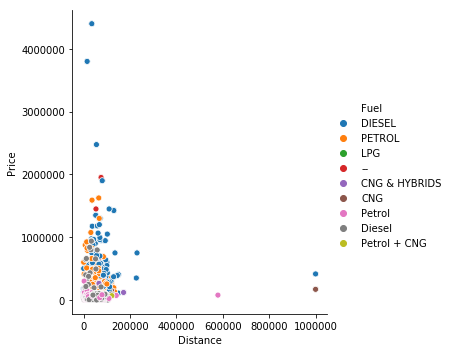

In [36]:
sns.relplot(x="Distance",y="Price",data=df, hue="Fuel")

Less the distance covered greater is the price also diesel cars are among those with high prices.

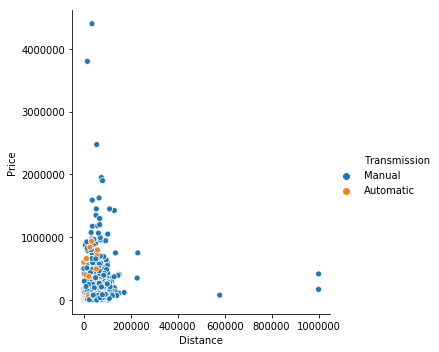

In [37]:
sns.relplot(x="Distance",y="Price",data=df, hue="Transmission")

#### Encoding all object type variables

In [38]:
lab_enc=LabelEncoder()
cols=["Fuel","Transmission","Model","website","CarName"]
for i in cols:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,CarName,Owner,YearofPurchase,Transmission,Model,Distance,Fuel,Price,website
0,132,1.0,2013.0,1,86,88147.0,3,590000,1
1,154,1.0,2016.0,1,17,59000.0,3,525000,1
2,169,1.0,2011.0,1,369,68000.0,6,215000,1
3,125,2.0,2014.0,1,135,56553.0,6,575000,1
4,214,1.0,2016.0,1,154,50509.0,3,600000,1


### Correlation

In [39]:
df.corr()

,CarName,Owner,YearofPurchase,Transmission,Model,Distance,Fuel,Price,website
CarName,1.000000,0.180398,-0.206795,0.119183,-0.196184,0.241256,-0.481943,0.453040,0.881442
Owner,0.180398,1.000000,-0.161467,-0.013525,-0.100473,0.093484,-0.064163,-0.054802,0.166646
YearofPurchase,-0.206795,-0.161467,1.000000,-0.086390,0.042965,-0.167613,0.127407,-0.130828,-0.236356
Transmission,0.119183,-0.013525,-0.086390,1.000000,0.017908,0.025029,-0.048980,0.023344,0.107162
Model,-0.196184,-0.100473,0.042965,0.017908,1.000000,-0.121221,0.201701,-0.212513,-0.307659
Distance,0.241256,0.093484,-0.167613,0.025029,-0.121221,1.000000,-0.243686,0.041227,0.230251
Fuel,-0.481943,-0.064163,0.127407,-0.048980,0.201701,-0.243686,1.000000,-0.421707,-0.535404
Price,0.453040,-0.054802,-0.130828,0.023344,-0.212513,0.041227,-0.421707,1.000000,0.558126
website,0.881442,0.166646,-0.236356,0.107162,-0.307659,0.230251,-0.535404,0.558126,1.000000


#### Heatmap

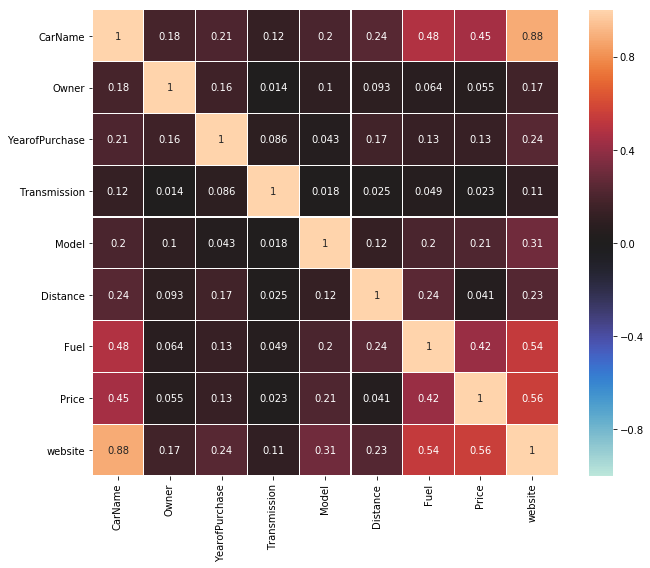

In [40]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

In [41]:
# Correlation with target variable
corr_mat=df.corr()
corr_mat["Price"].sort_values(ascending=False)

Price             1.000000
website           0.558126
CarName           0.453040
Distance          0.041227
Transmission      0.023344
Owner            -0.054802
YearofPurchase   -0.130828
Model            -0.212513
Fuel             -0.421707
Name: Price, dtype: float64

We obseve both positive and negative correlation between features and label. We also observe multicollinearity between Website and CarName but cannot draw any conclusion from this.

Also Price has Maximum Correlation with Website whereas Minimum Correlation with Tranmission.

#### Check for outliers

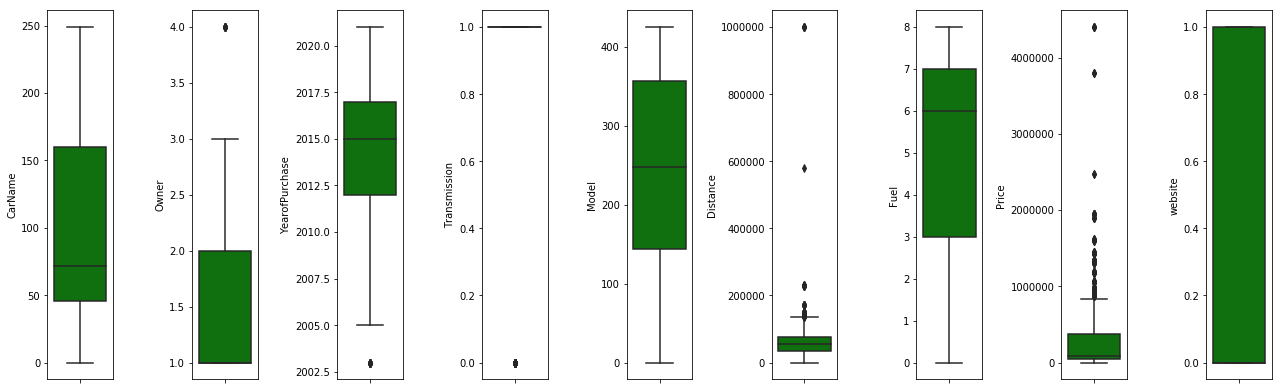

In [42]:
collist=df.columns.values
plt.figure(figsize=(40,80))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

We observe outliers an our data.

### Data Pre-Processing

In [43]:
q= df['Distance'].quantile(0.98) ## removes 2% of data we will choose this value on our own
data= df[df['Distance']<q]
data.shape

(1739, 9)

In [44]:
print("Percentage of data loss= ",((1800-1739)/1800)*100)

Percentage of data loss=  3.3888888888888893


#### Check for skewness in data

In [45]:
data.skew()

CarName           0.601236
Owner             1.849706
YearofPurchase   -0.686150
Transmission     -3.922957
Model            -0.303048
Distance          0.344759
Fuel             -0.434150
Price             4.478694
website           0.301492
dtype: float64

We don't observe skewness in continuous data and hence we can move further to scale and build our model.

In [46]:
# Splitting data
x=data.drop(columns=["Price"])
y=data["Price"]

In [47]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

## Model Building

In [48]:
#Finding the best random state and r2_score
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 92 ,the model performs well
Training r2_score is:  38.29349851015012
Testing r2_score is:  38.28020195606241


In [49]:
# Splitting data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=92)

#### Linear Regression

In [50]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
score_lm=lm.score(x_test,y_test)
print("Linear regression: Accuracy = ",score_lm)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Linear regression: Accuracy =  0.4012052494349163
Mean Absolute Error=  178701.69151004375
Mean Squared Error=  95296282075.04192


#### Model Regularization

In [51]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
score_lasso=lasso_reg.score(x_test,y_test)
score_lasso

0.4012274634080786

In [52]:
y_pred=lasso_reg.predict(x_test)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Absolute Error=  178694.66568731022
Mean Squared Error=  95292746791.79088


#### KNN Model

In [53]:
knn_r=KNeighborsRegressor()
knn_r.fit(x_train, y_train)
y_pred= knn_r.predict(x_test)
score_knnr=knn_r.score(x_test,y_test)
print("KNN regression: Accuracy = ",score_knnr)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

KNN regression: Accuracy =  0.5797470302191235
Mean Absolute Error=  121890.51494252874
Mean Squared Error=  66881924922.21848


#### DecisionTree Regressor

In [54]:
dt_r= DecisionTreeRegressor()
dt_r.fit(x_train, y_train)
y_pred= dt_r.predict(x_test)
score_dtr=dt_r.score(x_test,y_test)
print("Decision Tree regression: Accuracy = ",score_dtr)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Decision Tree regression: Accuracy =  0.9646906202308051
Mean Absolute Error=  29814.52643678161
Mean Squared Error=  5619375606.089655


#### RandomForest Regressor

In [55]:
rmf= RandomForestRegressor()
rmf.fit(x_train,y_train)
y_pred= rmf.predict(x_test)
score_rmf=rmf.score(x_test,y_test)
print("Random Forest regression: Accuracy = ",score_rmf)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Random Forest regression: Accuracy =  0.9611451244663923
Mean Absolute Error=  41099.07370881226
Mean Squared Error=  6183629992.325498


#### Gradient Boosting Regressor

In [56]:
gb= GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)
score_gb=gb.score(x_test,y_test)
print("Gradient Boosting regression: Accuracy = ",score_gb)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Gradient Boosting regression: Accuracy =  0.9255459967590469
Mean Absolute Error=  65054.2532670657
Mean Squared Error=  11849118062.191107


### Model Evaluation 
(Using Cross Validation technique)

#### Linear Regression

In [57]:
lm_cv=cross_val_score(lm,x_train, y_train,cv=5).mean()
lm_cv

0.3636708746123444

#### Lasso CV

In [58]:
lass_cv=cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()
lass_cv

0.36367294418612855

#### KNN Model

In [59]:
knn_cv=cross_val_score(knn_r,x_train, y_train,cv=5).mean()
knn_cv

0.5203595841928474

#### DecisionTree Regressor

In [60]:
dt_cv=cross_val_score(dt_r,x_train, y_train,cv=5).mean()
dt_cv

0.8493623759939648

#### RandomForest Regressor

In [61]:
rmf_cv=cross_val_score(rmf,x_train, y_train,cv=5).mean()
rmf_cv

0.8594166571440696

#### Gradient Boosting Regressor

In [62]:
gb_cv=cross_val_score(gb,x_train, y_train,cv=5).mean()
gb_cv

0.8806007876760684

In [63]:
model=pd.DataFrame()
model["Model"]=["LinearRegression","Lasso","KNN","DecsionTree","RandomForest","GradientBoosting"]
model["R2_Score"]=[score_lm,score_lasso,score_knnr,score_dtr,score_rmf,score_gb]
model["CV Score"]=[lm_cv,lass_cv,knn_cv,dt_cv,rmf_cv,gb_cv]
model["Difference"]=[score_lm-lm_cv,score_lasso-lass_cv,score_knnr-knn_cv,score_dtr-dt_cv,score_rmf-rmf_cv,score_gb-gb_cv]
model

,Model,R2_Score,CV Score,Difference
0,LinearRegression,0.401205,0.363671,0.037534
1,Lasso,0.401227,0.363673,0.037555
2,KNN,0.579747,0.520360,0.059387
3,DecsionTree,0.964691,0.849362,0.115328
4,RandomForest,0.961145,0.859417,0.101728
5,GradientBoosting,0.925546,0.880601,0.044945


We'll Choose GradientBoosting Model as our best model and move further to tune this model.

### Hyper Parametric Tuning

In [64]:
x_train, x_test, y_train,  y_test= train_test_split(x_scaled,y, test_size=0.25,random_state=92)
gb= GradientBoostingRegressor()
params={'loss':['ls','lad'],'n_estimators':[13,15], 'criterion':['friedman_mse','mae'],
       'max_depth':[5,10], 'min_samples_split':[4,6],
       'min_samples_leaf':[2,3]}
grd=GridSearchCV(gb,param_grid=params)
grd.fit(x_train,y_train)
print('best params=>',grd.best_params_)

best params=> {'criterion': 'friedman_mse', 'loss': 'ls', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 15}


In [65]:
gbr= grd.best_estimator_
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("Gradient Boosting Regression: Accuracy = ",gbr.score(x_test,y_test))
print("\n Mean Squared Error= ",mean_squared_error(y_test,y_pred))
print("\n Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("\n Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Gradient Boosting Regression: Accuracy =  0.9187764506451738

 Mean Squared Error=  12926469818.162355

 Root Mean Squared Error=  113694.6340781409

 Mean Absolute Error=  71002.34225913782


In [66]:
#Comparing actual and predicted values with the help of a dataframe
predictions=pd.DataFrame({'Original_price':y_test, 'Predicted_price':y_pred})
predictions

,Original_price,Predicted_price
1761,39299,9.343564e+04
1138,46799,9.648360e+04
1697,89099,9.160918e+04
199,80000,1.352179e+05
1227,19000,9.571343e+04
492,590000,5.296719e+05
1593,21499,1.053240e+05
909,33699,9.159027e+04
113,460000,4.644063e+05
1248,90000,9.431873e+04


### Saving Model

In [67]:
## savig model
filename= "CarPrice_prediction.pickle"
pickle.dump(gbr, open(filename, 'wb'))

In [68]:
#Saving the predicted values
results=pd.DataFrame(predictions)
results.to_csv('Car_Price_Prediction_Results.csv')